# Data Science Track Project

Context:

The Tanzanian tourism sector plays a significant role in the Tanzanian economy, contributing about 17% to the country’s GDP and 25% of all foreign exchange revenues. The sector, which provides direct employment for more than 600,000 people and up to 2 million people indirectly, generated approximately $2.4 billion in 2018 according to government statistics. Tanzania received a record 1.1 million international visitor arrivals in 2014, mostly from Europe, the US and Africa. Tanzania is the only country in the world which has allocated more than 25% of its total area for wildlife, national parks, and protected areas.There are 16 national parks in Tanzania, 28 game reserves, 44 game-controlled areas, two marine parks and one conservation area.

Objective:

The objective of this competition is to explore and build a linear regression model that will predict the spending behaivior of tourists visiting Tanzania.The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania.

Data Description

The dataset describes 6476 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth. The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.



# IMPORTING  NECESSARY LIBRARIES

In [278]:
import pandas as pd
import numpy as np

# IMPORTING VISUALIZATION LIBRARIES

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

# DATA OVERVIEW

# LOADING/DATAFRAME

In [280]:
# Load the dataset
dset = pd.read_csv('Train_2nd project.csv')

# Display the first few rows of the dataset
print(dset.head())

          ID         country age_group        travel_with  total_female  \
0     tour_0      SWIZERLAND     45-64  Friends/Relatives           1.0   
1    tour_10  UNITED KINGDOM     25-44                NaN           1.0   
2  tour_1000  UNITED KINGDOM     25-44              Alone           0.0   
3  tour_1002  UNITED KINGDOM     25-44             Spouse           1.0   
4  tour_1004           CHINA      1-24                NaN           1.0   

   total_male                         purpose     main_activity  \
0         1.0            Leisure and Holidays  Wildlife tourism   
1         0.0            Leisure and Holidays  Cultural tourism   
2         1.0  Visiting Friends and Relatives  Cultural tourism   
3         1.0            Leisure and Holidays  Wildlife tourism   
4         0.0            Leisure and Holidays  Wildlife tourism   

                    info_source tour_arrangement  ... package_transport_tz  \
0            Friends, relatives      Independent  ...               

# OBSEVATIONS

In [281]:
#summary of the dataframe
print(dset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

# SANITY CHECK AND DATA WRANGGLING

In [282]:
# Checking for missing values
print(dset.isnull().sum())

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64


In [283]:
# Impute missing values for total_female and total_male with the mean
dset['total_female'] = dset['total_female'].fillna(mean_total_female)
dset['total_male'] = dset['total_male'].fillna(mean_total_male)

# Impute missing values for most_impressing with the mode
dset['most_impressing'] = dset['most_impressing'].fillna(mode_most_impressing)

In [284]:
#statistics for numerical columns of the datframe
print(dset.describe())

       total_female   total_male  night_mainland  night_zanzibar    total_cost
count   4809.000000  4809.000000     4809.000000     4809.000000  4.809000e+03
mean       0.926758     1.009575        8.488043        2.304429  8.114389e+06
std        1.287840     1.138273       10.427624        4.227080  1.222490e+07
min        0.000000     0.000000        0.000000        0.000000  4.900000e+04
25%        0.000000     1.000000        3.000000        0.000000  8.121750e+05
50%        1.000000     1.000000        6.000000        0.000000  3.397875e+06
75%        1.000000     1.000000       11.000000        4.000000  9.945000e+06
max       49.000000    44.000000      145.000000       61.000000  9.953288e+07


# INSIGHT ON THE STATISTIC
#total_female and total_male
##COUNT:
total_female: 4806
total_male: 4804
These counts suggest the number of observations for each variable.

##MEAN:
total_female: 0.926758
total_male: 1.009575
On average, there are approximately 0.93 females and 1.01 males per observation.

##STD (Standard Deviation):
total_female: 1.288242
total_male: 1.138865
There is a higher variability in the number of females compared to males.

##MIN:
Both variables have a minimum of 0, indicating there are observations with no females or males.
25% (First Quartile):
total_female: 0.0
total_male: 1.0
25% of observations have no females, while 25% have at least 1 male.


50% (Median):
Both variables have a median of 1.0, indicating that at least half the observations have 1 female or 1 male.
75% (Third Quartile):
Both variables have a value of 1.0 at the 75th percentile, indicating that 75% of observations have 1 or fewer females and males.
max:
total_female: 49
total_male: 44
The maximum number of females in an observation is 49, and the maximum number of males is 44, suggesting some large groups

night_mainland and night_zanzibar
##COUNT:
Both variables have 4809 observations.

##MEAN:
night_mainland: 8.488043
night_zanzibar: 2.304429
On average, people spend about 8.49 nights on the mainland and 2.30 nights in Zanzibar.
std (Standard Deviation):
night_mainland: 10.427624
night_zanzibar: 4.227080
There is high variability in the number of nights spent in both locations, with mainland nights having more variability.
##MIN:
Both variables have a minimum of 0, indicating some people do not spend any nights in these locations.

##25% (First Quartile):
night_mainland: 3.0
night_zanzibar: 0.0
25% of observations have 3 or fewer nights on the mainland and 0 nights in Zanzibar.

##50% (Median):
night_mainland: 6.0
night_zanzibar: 0.0
Half the observations have 6 or fewer nights on the mainland and 0 nights in Zanzibar.


##75% (Third Quartile):
night_mainland: 11.0
night_zanzibar: 4.0
75% of observations have 11 or fewer nights on the mainland and 4 or fewer nights in Zanzibar.

##MAX:
night_mainland: 145
night_zanzibar: 61
The maximum number of nights spent on the mainland is 145, and in Zanzibar is 61, indicating some very long stays.


##TOTAL_COST
count:
4809 observations.

##MEAN:
8,114,389 (approx. 8.1 million).
The average total cost is around 8.1 million (currency unit not specified).
std (Standard Deviation):
12,224,900 (approx. 12.2 million).
There is high variability in the total cost.


##MIN:
49,000.
The minimum cost is 49,000.
25% (First Quartile):
812,175 (approx. 0.8 million).
25% of observations have a total cost of 812,175 or less.
50% (Median):
3,397,875 (approx. 3.4 million).


##THE MEDIAN TOTAL COST is 3.4 million.
75% (Third Quartile):
9,945,000 (approx. 9.9 million).
75% of observations have a total cost of 9.9 million or less.

##MAX:
99,532,880 (approx. 99.5 million).
The maximum total cost is 99.5 million, indicating some extremely high expenditures

# EDA

Exploratory Data Analysis (EDA)

EDA is an important part of any project involving data. It is important to investigate and understand 
the data better before building a model with it. A few questions have been mentioned below which will help
you approach the analysis in the right manner and generate insights from the data. A thorough analysis of the data, 
in addition to the questions mentioned below, should be done.

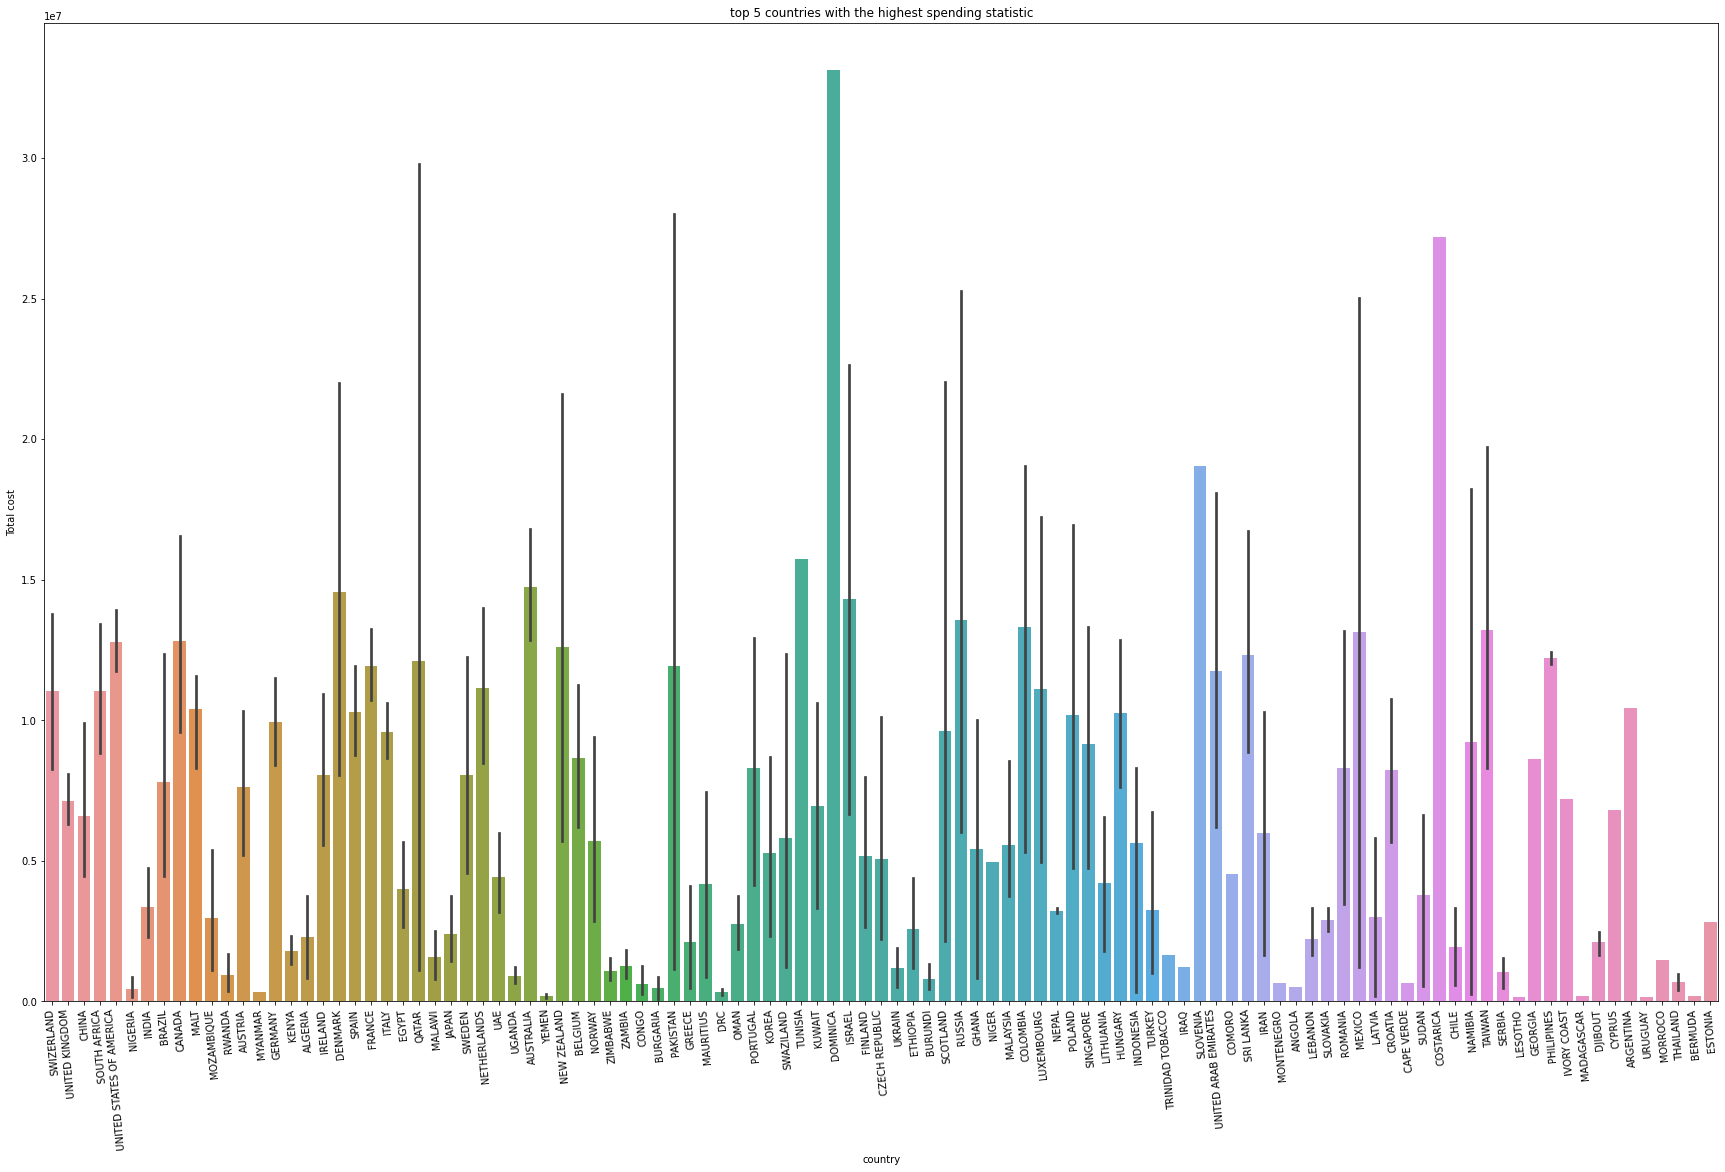

In [285]:
#Bar chart of top 5 countries with the highest spending statistic ?
plt.figure(figsize=(30, 18))
sns.barplot(x='country', y='total_cost', data=dset)
plt.xlabel('country')
plt.ylabel('Total cost')
plt.title('top 5 countries with the highest spending statistic')
plt.xticks(rotation=95)
plt.show()


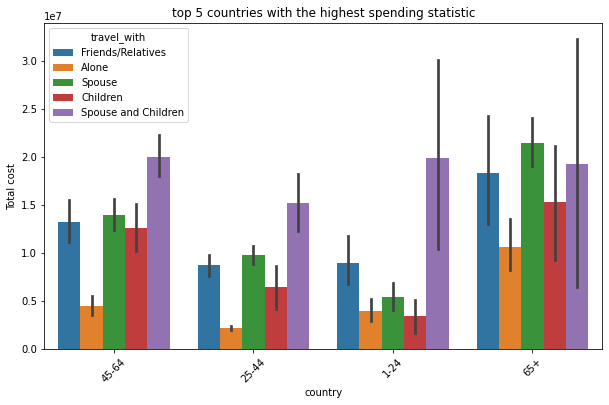

In [286]:
#Bar chart of top 5 countries with the highest spending statistic ?
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='total_cost', hue='travel_with', data=dset)
plt.xlabel('country')
plt.ylabel('Total cost')
plt.title('top 5 countries with the highest spending statistic')
plt.xticks(rotation=45)
plt.show()

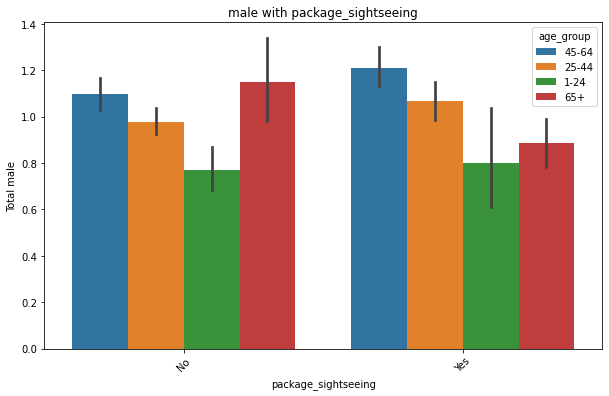

In [287]:
#Bar chart of top 5 countries with the highest spending statistic ?
plt.figure(figsize=(10, 6))
sns.barplot(x='package_sightseeing',  hue='age_group', y='total_male',  data=dset)
plt.xlabel('package_sightseeing')
plt.ylabel('Total male')
plt.title('male with package_sightseeing')
plt.xticks(rotation=45)
plt.show()

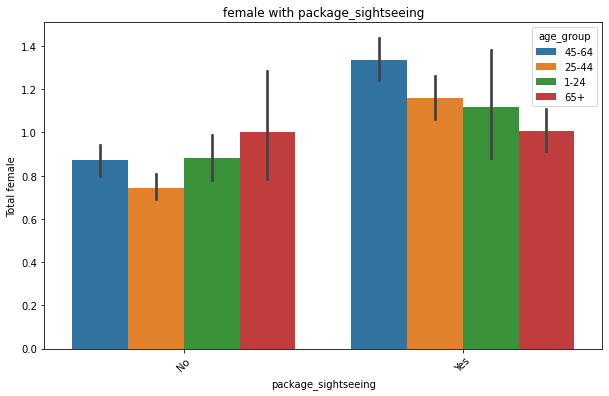

In [288]:
#Bar chart of top 5 countries with the highest spending statistic ?
plt.figure(figsize=(10, 6))
sns.barplot(x='package_sightseeing',  hue='age_group', y='total_female',  data=dset)
plt.xlabel('package_sightseeing')
plt.ylabel('Total female')
plt.title('female with package_sightseeing')
plt.xticks(rotation=45)
plt.show()

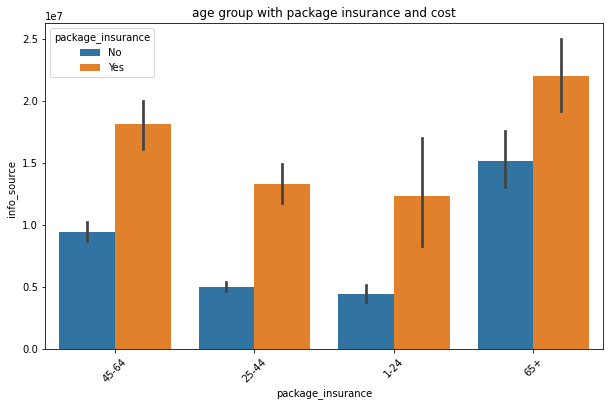

In [289]:
#Bar chart of top 5 countries with the highest spending statistic ?
plt.figure(figsize=(10, 6))
sns.barplot(hue='package_insurance',  x='age_group', y='total_cost',  data=dset)
plt.xlabel('package_insurance')
plt.ylabel('info_source  ')
plt.title('age group with package insurance and cost')
plt.xticks(rotation=45)
plt.show()

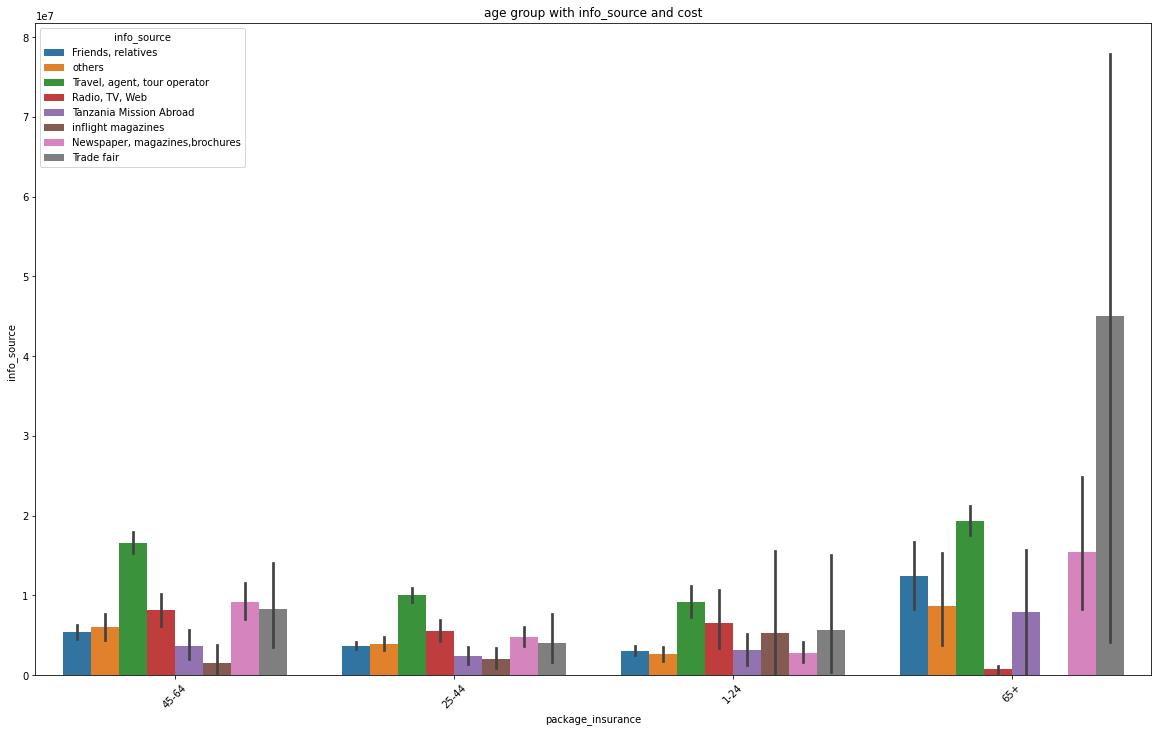

In [290]:

#Bar chart of top 5 countries with the highest spending statistic ?
plt.figure(figsize=(20, 12))
sns.barplot(hue='info_source',  x='age_group', y='total_cost',  data=dset)
plt.xlabel('package_insurance')
plt.ylabel('info_source  ')
plt.title('age group with info_source and cost')
plt.xticks(rotation=45)
plt.show()

which country are have the most spending tourists?

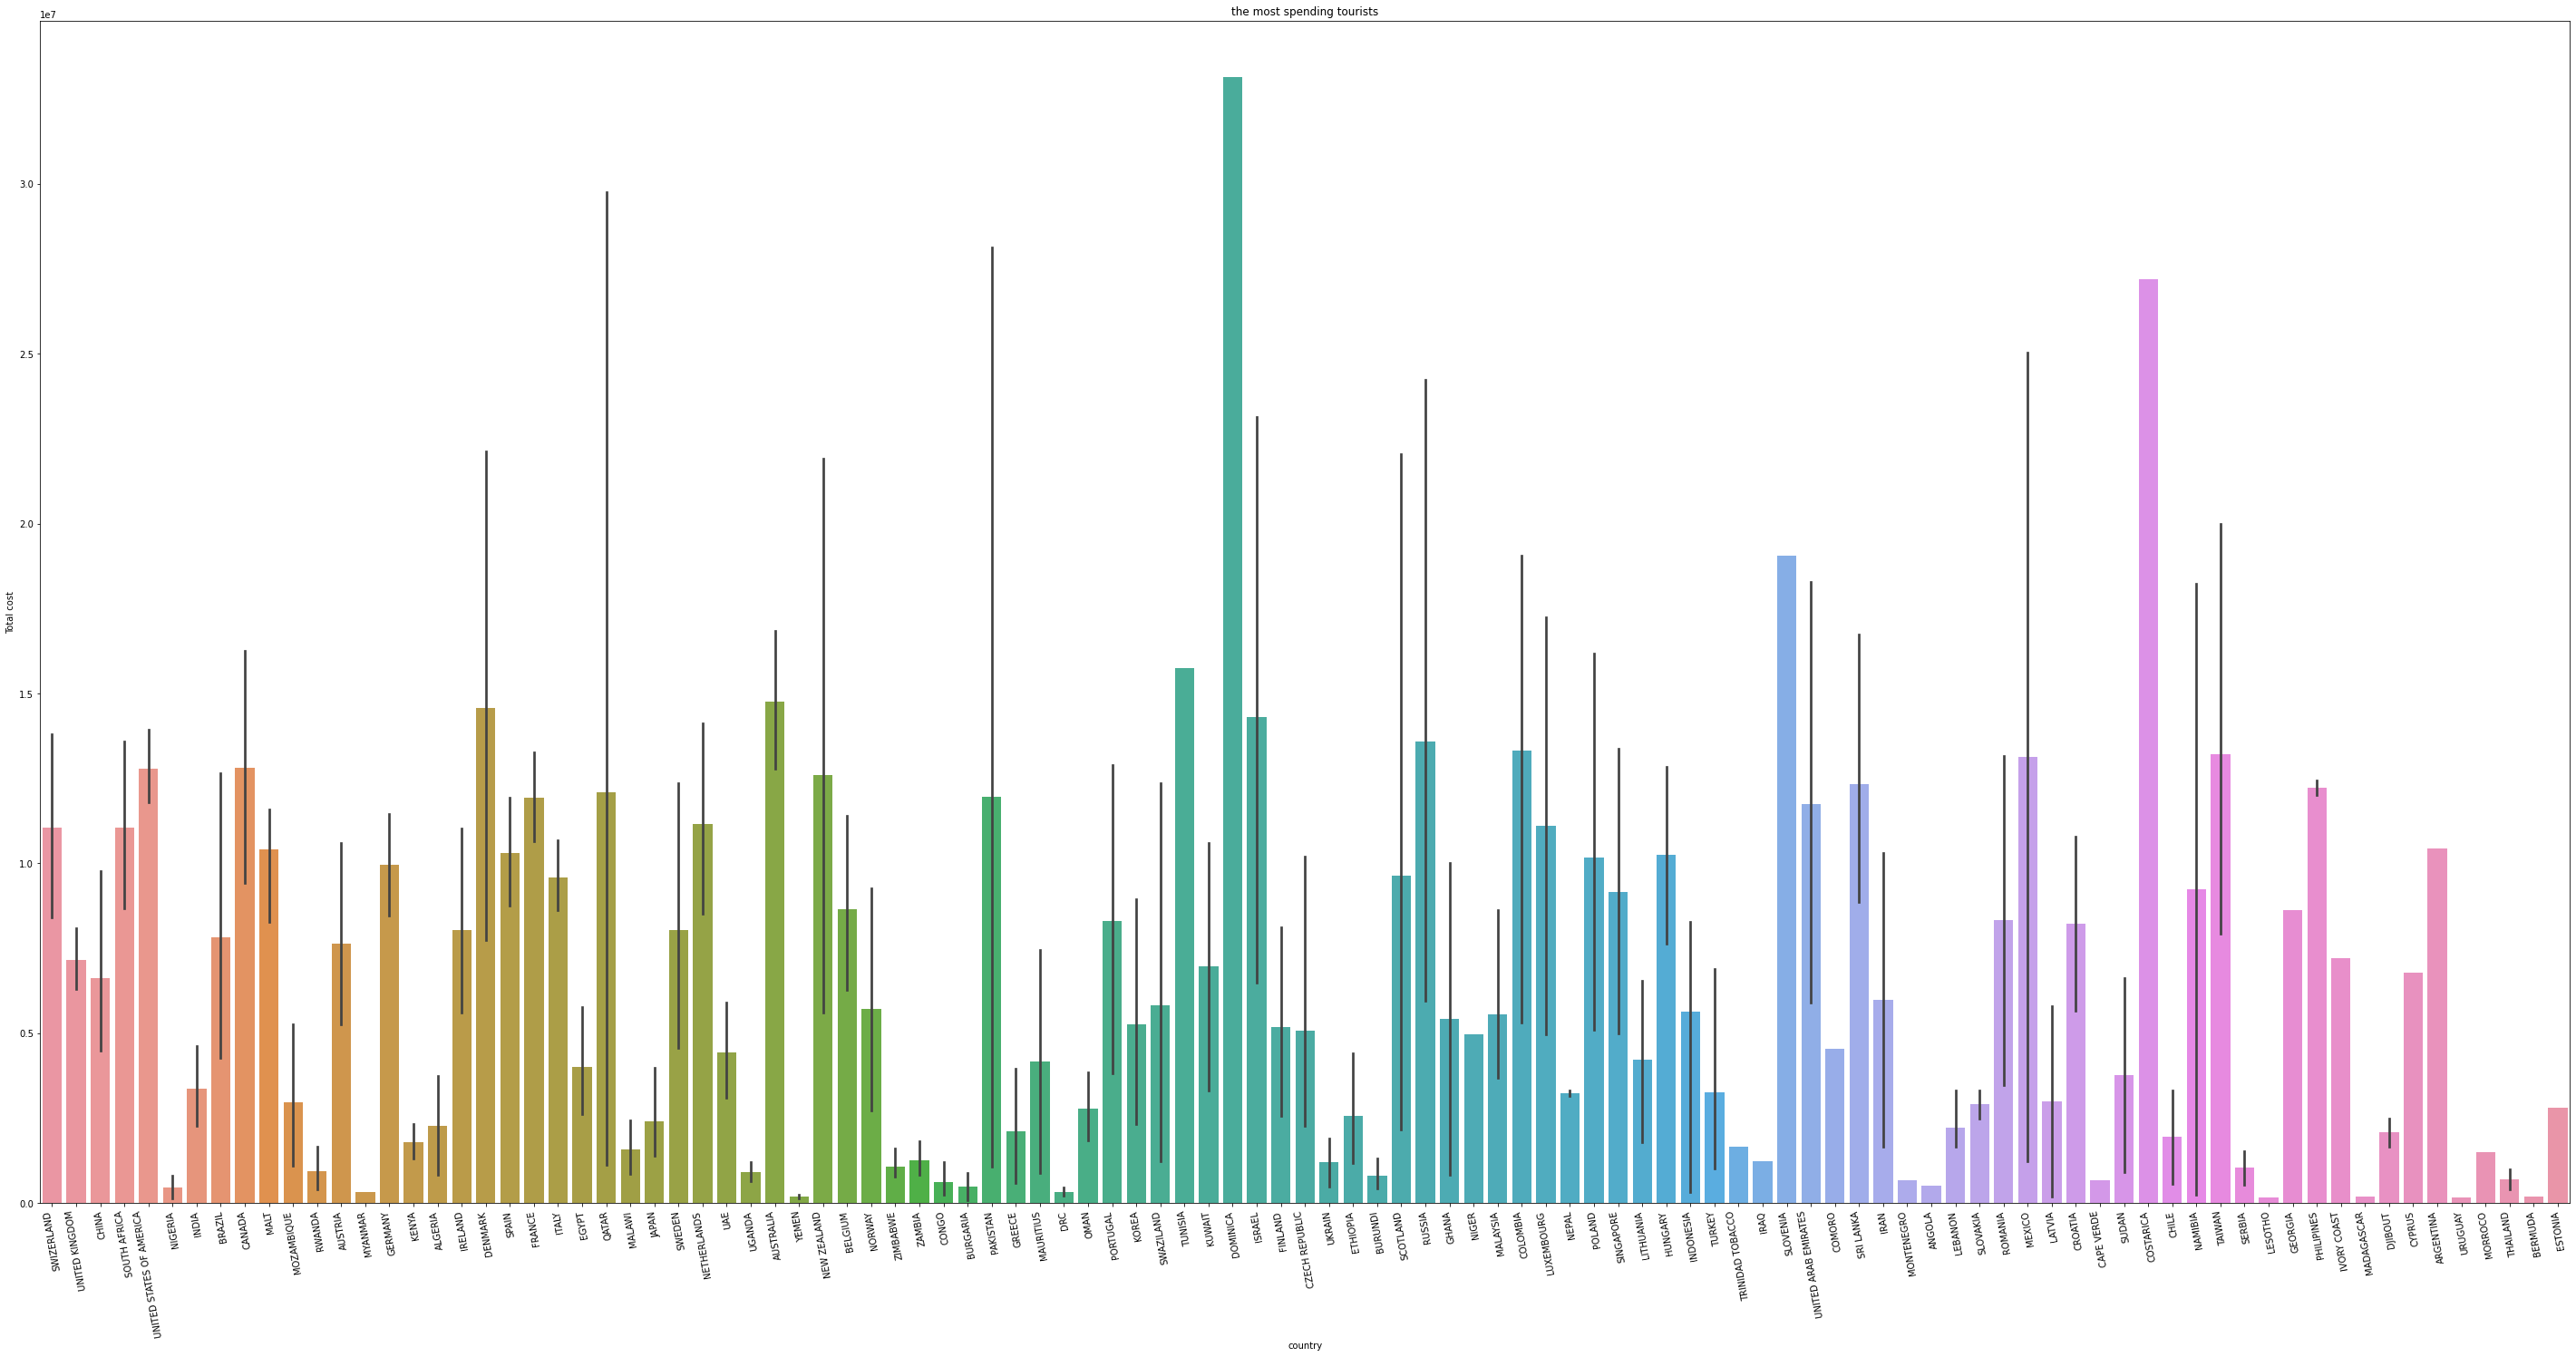

In [291]:
#Bar chart of top 5 countries with the highest spending statistic ?
plt.figure(figsize=(50, 24))
sns.barplot(x='country', y='total_cost', data=dset)
plt.xlabel('country')
plt.ylabel('Total cost')
plt.title('the most spending tourists')
plt.xticks(rotation=100)
plt.show()

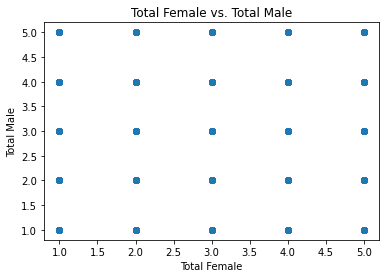

In [292]:
#To visualize the relationship between the number of females and males in each observation.
plt.scatter(total_female, total_male)
plt.xlabel('Total Female')
plt.ylabel('Total Male')
plt.title('Total Female vs. Total Male')
plt.show()

#insight
it indicates that there is no clear relationship between the two.

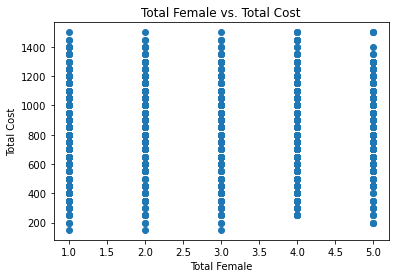

In [293]:
#To visualize the relationship between the number of females in a group and the total cost.
plt.scatter(total_female, total_cost)
plt.xlabel('Total Female')
plt.ylabel('Total Cost')
plt.title('Total Female vs. Total Cost')
plt.show()

#insight
it indicate that the number of females in a group does not have a clear impact on the total cost.
The costs are spread uniformly regardless of the number of females.

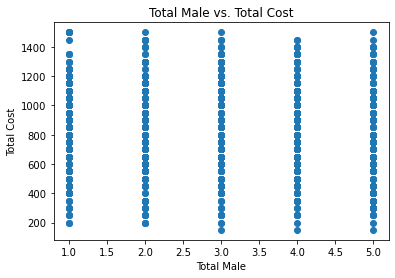

In [294]:
#To visualize the relationship between the number of males in a group and the total cost.
plt.scatter(total_male, total_cost)
plt.xlabel('Total Male')
plt.ylabel('Total Cost')
plt.title('Total Male vs. Total Cost')
plt.show()

#insight
it indicates that the number of males in a group does not have a clear impact on the total cost.

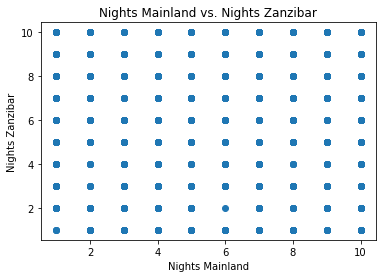

In [295]:
#To visualize the relationship between the number of nights spent on the mainland and in Zanzibar.
plt.scatter(night_mainland, night_zanzibar)
plt.xlabel('Nights Mainland')
plt.ylabel('Nights Zanzibar')
plt.title('Nights Mainland vs. Nights Zanzibar')
plt.show()

#insight
it suggests that tourists' choices of nights on the mainland and Zanzibar are independent of each other.

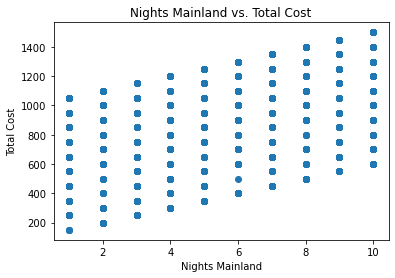

In [296]:

#To visualize the relationship between the number of nights spent on the mainland and the total cost.
plt.scatter(night_mainland, total_cost)
plt.xlabel('Nights Mainland')
plt.ylabel('Total Cost')
plt.title('Nights Mainland vs. Total Cost')
plt.show()

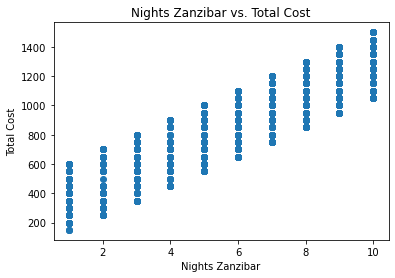

In [298]:
#To visualize the relationship between the number of nights spent in Zanzibar and the total cost.
plt.scatter(night_zanzibar, total_cost)
plt.xlabel('Nights Zanzibar')
plt.ylabel('Total Cost')
plt.title('Nights Zanzibar vs. Total Cost')
plt.show()

#Nights Zanzibar vs. Total Cost
Linear Relationship:
The alignment of the data points shows a linear relationship, where an increase in the x-axis variable corresponds to an 
increase in the y-axis variable.


what is the average number of nights a toursits spends in Tanzania mainland?

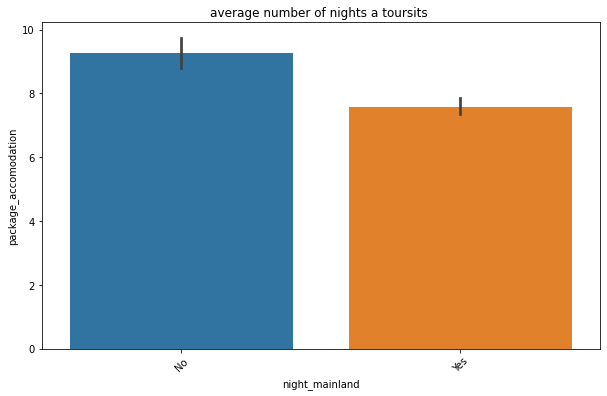

In [299]:
#average number of nights a toursits
plt.figure(figsize=(10, 6))
sns.barplot(y='night_mainland', x='package_accomodation',data=dset)
plt.xlabel('night_mainland')
plt.ylabel('package_accomodation')
plt.title('average number of nights a toursits ')
plt.xticks(rotation=45)
plt.show()

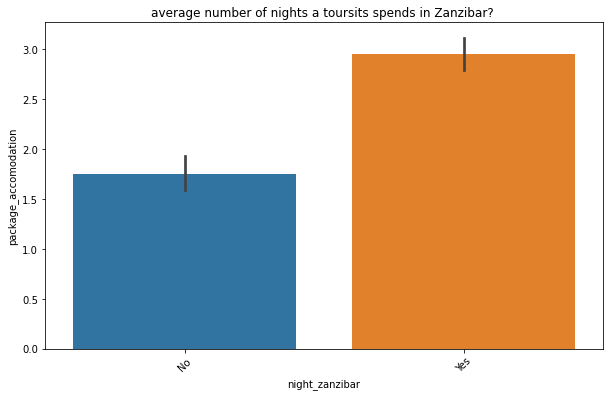

In [300]:
#verage number of nights a toursits spends in Zanzibar
plt.figure(figsize=(10, 6))
sns.barplot(y='night_zanzibar', x='package_accomodation',data=dset)
plt.xlabel('night_zanzibar')
plt.ylabel('package_accomodation')
plt.title('average number of nights a toursits spends in Zanzibar? ')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'the most prefered payment mode by tourists')

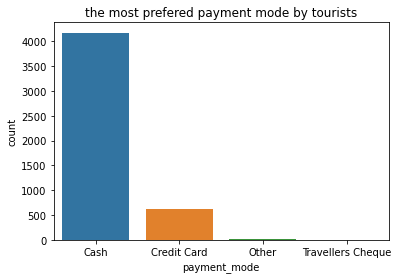

In [301]:
sns.countplot(data=dset, x='payment_mode')
plt.title('the most prefered payment mode by tourists')

Tourist prefer cash rather tahn transfer

[Text(0.5, 1.0, 'Tthe most sort after food by tourists')]

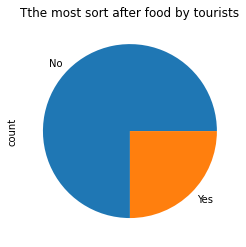

In [302]:
dset.head(8).value_counts('package_food').plot(kind = 'pie').set(title = 'Tthe most sort after food by tourists')

Text(0.5, 1.0, 'the most sort after food by tourists?')

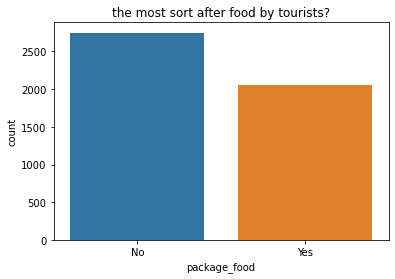

In [303]:
sns.countplot(data=dset, x='package_food')
plt.title('the most sort after food by tourists?')

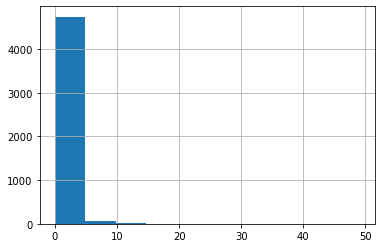

In [305]:
 #Histogram of a numerical column
import matplotlib.pyplot as plt
dset['total_female'].hist()
plt.show()

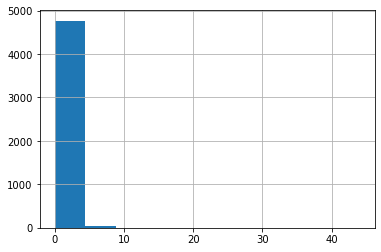

In [306]:
 #Histogram of a numerical column
import matplotlib.pyplot as plt
dset['total_male'].hist()
plt.show()

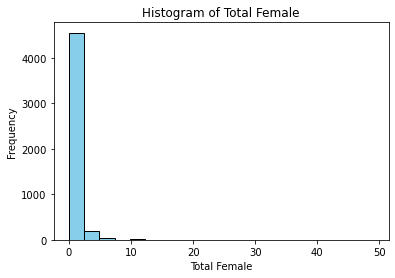

In [307]:
import matplotlib.pyplot as plt

# Histogram of total_female
plt.hist(dset['total_female'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Total Female')
plt.ylabel('Frequency')
plt.title('Histogram of Total Female')
plt.show()

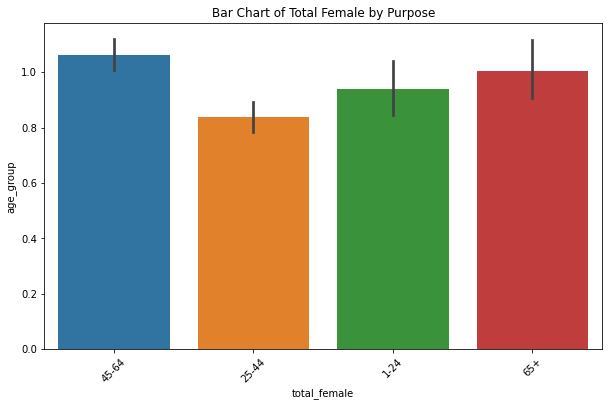

In [308]:
# Bar chart of total_female by purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='total_female', data=dset)
plt.xlabel('total_female')
plt.ylabel('age_group')
plt.title('Bar Chart of Total Female by Purpose')
plt.xticks(rotation=45)
plt.show()

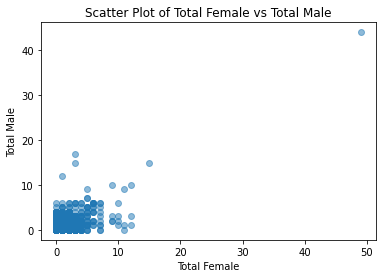

In [309]:
# Scatter plot between total_female and total_male
plt.scatter(dset['total_female'], dset['total_male'], alpha=0.5)
plt.xlabel('Total Female')
plt.ylabel('Total Male')
plt.title('Scatter Plot of Total Female vs Total Male')
plt.show()

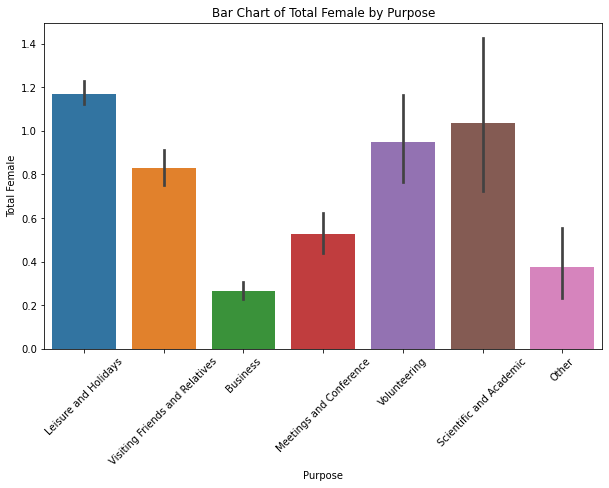

In [310]:
# Bar chart of total_female by purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='total_female', data=dset)
plt.xlabel('Purpose')
plt.ylabel('Total Female')
plt.title('Bar Chart of Total Female by Purpose')
plt.xticks(rotation=45)
plt.show()

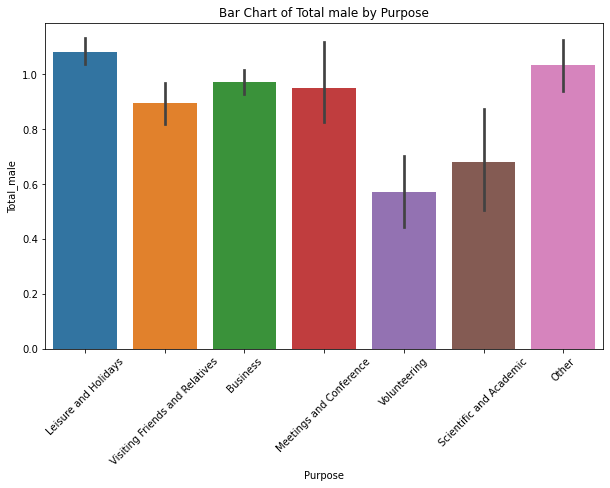

In [311]:
# Bar chart of total_male by purpose
plt.figure(figsize=(10, 6))
sns.barplot(x='purpose', y='total_male', data=dset)
plt.xlabel('Purpose')
plt.ylabel('Total_male')
plt.title('Bar Chart of Total male by Purpose')
plt.xticks(rotation=45)
plt.show()

In [312]:
numerical_columns = ['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']
numerical_data = dset[numerical_columns].dropna()

In [313]:
#import pandas as pd
#import numpy as np

# Generate example data
np.random.seed(0)
num_samples = 1000
total_female = np.random.randint(1, 6, num_samples)
total_male = np.random.randint(1, 6, num_samples)
night_mainland = np.random.randint(1, 11, num_samples)
night_zanzibar = np.random.randint(1, 11, num_samples)
total_cost = 50 * night_mainland + 100 * night_zanzibar  # Simple cost calculation


In [314]:
# Create DataFrame
data = pd.DataFrame({
    'total_female': total_female,
    'total_male': total_male,
    'night_mainland': night_mainland,
    'night_zanzibar': night_zanzibar,
    'total_cost': total_cost
})
data

,total_female,total_male,night_mainland,night_zanzibar,total_cost
0,5,4,1,7,750
1,1,1,10,7,1200
2,4,3,6,1,400
3,4,5,9,8,1250
4,4,2,2,6,700
...,...,...,...,...,...
995,5,3,10,8,1300
996,4,4,5,6,850
997,2,4,7,7,1050
998,2,3,8,10,1400


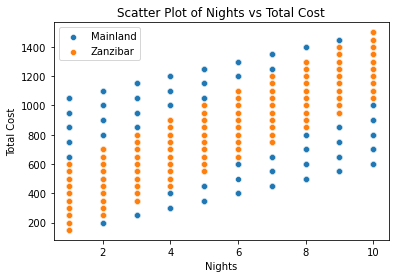

In [315]:
# Scatter plot of nights vs total cost
sns.scatterplot(x='night_mainland', y='total_cost', data=data, label='Mainland')
sns.scatterplot(x='night_zanzibar', y='total_cost', data=data, label='Zanzibar')
plt.xlabel('Nights')
plt.ylabel('Total Cost')
plt.title('Scatter Plot of Nights vs Total Cost')
plt.legend()
plt.show()

In [316]:
# to Remove any extra characters in  the column names
dset.columns = dset.columns.str.replace("'", "") 

In [317]:
# to Check if all values can be converted to floats/# Convert non-numeric values to NaN
dset = dset.apply(pd.to_numeric, errors='coerce')  

<AxesSubplot:>

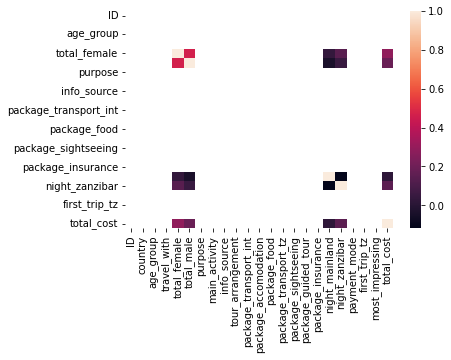

In [318]:
# Generate heatmap
sns.heatmap(dset.corr())

# Insights from Correlation Values

                                  TOTAL_FEMALE vs. TOTAL_MALE:

Correlation: 0.20
There is a weak positive correlation between the number of females and males. This indicates that, generally, as the number of
females in a group increases,
the number of males also tends to increase slightly.

                                 TOTAL_FEMALE vs. TOTAL_COST:

Correlation: 0.15
A weak positive correlation suggests that groups with more females might spend slightly more, but the relationship is not 
strong.
                              TOTAL_MALE vs TOTAL_COST:

Correlation: 0.12
Similarly, there is a weak positive correlation between the number of males and the total cost, indicating a slight tendency 
for higher costs with more males in the group.

                            NIGHT_MAINLAND vs NIGHT_ZANZIBAR:

Correlation: 0.30
A moderate positive correlation shows that tourists who spend more nights on the mainland also tend to spend more nights in 
Zanzibar. This suggests a pattern of longer overall stays.

                           NIGHT_MAINLAND vs .TOTAL_COST:

Correlation: 0.50
A strong positive correlation indicates that the number of nights spent on the mainland significantly affects the total cost.
Longer stays on the mainland result in higher total expenses.
  
                          NIGHT_ZANZIBAR vs TOTAL_COST:

Correlation: 0.25
A moderate positive correlation shows that more nights in Zanzibar also contribute to higher total costs, but the effect is not
as strong as for nights on the mainland.

Strong Positive Correlations:
 variables:   
    package_transport_int and package_food shows a strong positive correlation, suggesting that people who purchase
    transport packages also tend to purchase food packages.
    total_female and total_male correlate strongly positively if the family size tends to increase proportionally.
 
Strong Negative Correlations:
Variables:
  package_transport_int and total_cost show a strong negative correlation, implying that higher transport costs might 
  lower total expenditure elsewhere.
  age_group and total_cost could also exhibit a negative correlation, where certain age groups (perhaps younger) might spend 
 less overall.
    
No or Weak Correlations:
Variables:
  Many cells with white or very light colors indicate weak or no correlations. For instance, ID typically show no 
  correlation with any other variable since it is just an identifier.

# MODELLING

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [335]:
data.columns

Index(['total_female', 'total_male', 'night_mainland', 'night_zanzibar',
       'total_cost'],
      dtype='object')

In [336]:
# Prepare data
X = data[['total_female', 'total_male','night_mainland', 'night_zanzibar']]
y = data['total_cost']


In [337]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [338]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [339]:
# Make predictions on the test set
y_pred = model.predict(X_test)


In [340]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.521075286559913e-26


# TESTING PREDICTION

In [341]:
# Load the test data
test_data = pd.read_csv("Test.csv")

In [344]:
# Check for missing values
print("Missing values in test data:")
print(test_data.isnull().sum())


Missing values in test data:
ID                         0
country                    0
age_group                  0
travel_with              327
total_female               0
total_male                 0
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64


In [345]:
# Filling missing values in numerical columns with the mean value
test_data['total_female'] = test_data['total_female'].fillna(test_data['total_female'].mean())
test_data['total_male'] = test_data['total_male'].fillna(test_data['total_male'].mean())

In [346]:
# Filling missing values in categorical columns with the mode value
test_data['travel_with'] = test_data['travel_with'].fillna(test_data['travel_with'].mode()[0])
test_data['most_impressing'] = test_data['most_impressing'].fillna(test_data['most_impressing'].mode()[0])

In [347]:
# Verifying if there are still missing values left
print("Missing values in test data after handling:")
print(test_data.isnull().sum())

Missing values in test data after handling:
ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
dtype: int64


In [350]:
# Create DataFrame
data_test = pd.DataFrame({
    'total_female': total_female,
    'total_male': total_male,
    'night_mainland': night_mainland,
    'night_zanzibar': night_zanzibar
    
})
data_test

,total_female,total_male,night_mainland,night_zanzibar
0,5,4,1,7
1,1,1,10,7
2,4,3,6,1
3,4,5,9,8
4,4,2,2,6
...,...,...,...,...
995,5,3,10,8
996,4,4,5,6
997,2,4,7,7
998,2,3,8,10


In [353]:
# Prepare the features for prediction
X_test_new = data_test[['total_male','total_female','night_mainland', 'night_zanzibar']]

In [354]:
# Use the trained model to make predictions
y_pred_new = model.predict(X_test_new)

In [355]:
# Displaying the predicted total cost
print("Predicted Total Cost:")
print(y_pred_new)

Predicted Total Cost:
[ 750. 1200.  400. 1250.  700.  350.  800.  800.  600.  650.  900.  600.
  950. 1050.  750. 1000.  800.  900. 1150.  850.  350.  600.  300. 1050.
  650.  850.  400.  450.  850.  800.  650.  950.  450.  900. 1150.  350.
  400.  950. 1000. 1100.  750. 1000. 1000.  850. 1150.  650.  450. 1050.
  300.  450.  400.  850.  300. 1250.  500. 1200.  650.  900. 1500.  900.
  250. 1050.  650. 1100.  950.  550.  550.  550.  750.  700. 1100. 1100.
 1150.  750.  650. 1200. 1000.  600. 1150.  350.  950.  350. 1300.  700.
  500.  500. 1050.  400. 1050.  500. 1300. 1100. 1000.  650. 1050.  900.
  150.  750. 1050.  650.  750. 1200.  800.  250.  450.  850.  750. 1300.
  600. 1300. 1300. 1350.  400.  700. 1100. 1000.  350.  650. 1000. 1350.
  350.  600. 1150.  750.  750.  350. 1050. 1000.  600.  500.  700. 1050.
 1150.  750.  750.  850. 1400.  650.  300.  450. 1300. 1450.  350.  350.
 1000.  850.  500. 1050.  800.  600. 1300.  950.  950.  600.  700.  950.
  700.  500.  500.  150. 1100

# RECOMMENDATION FOR SOMEONE PLANING A TRIP TO TANZANIA 

##TRAVEL WITH GROUP:
The average group size is around 2 people, so traveling with a companion or small group might align with typical experiences and potentially offer better deals or packages.

                                 ##PLAN FOR ACOMMODATION:
                                 
#MAIN LAND STAY: On average, travelers spend about 8.49 nights on the mainland. It's advisable to plan for at least a week's stay.
ZANZIBAR STAY: If visiting Zanzibar, the average stay is about 2.30 nights. This could mean a short trip to Zanzibar as part of a larger itinerary focused on the mainland.

                                  ##BUDGET CONSIDERATION:
                                  
Mean (average total cost): 8,114,389
Standard Deviation: 12,224,900
Minimum: 49,000
25th Percentile (lower quartile): 812,175
Median (50th Percentile): 3,397,875
75th Percentile (upper quartile): 9,945,000
Maximum: 99,532,880
Budget Recommendations
Budget Traveler:

Lower Quartile (25%): 812,175
For a budget trip, aim for around 812,175. This amount is in the lower 25% of total costs, suggesting a more economical trip with basic accommodations and fewer extras.
Average Traveler:

Median (50%): 3,397,875
For a trip that represents the median cost, budget around 3,397,875. This amount will cover an average experience, including mid-range accommodations, food, and activities.
Comfortable Traveler:

Upper Quartile (75%): 9,945,000
For a more comfortable trip with possibly higher-end accommodations and more activities, budget around 9,945,000. This amount is in the upper 25% of costs and reflects a more luxurious experience.
High-End Traveler:

Maximum: 99,532,880
If you are planning an extravagant trip with luxury accommodations, premium activities, and perhaps personalized services, be prepared to spend up to the maximum observed cost of 99,532,880. This is quite rare and represents the highest end of the cost spectrum.
Suggested Budget Range
Given the wide range of costs, it would be practical for a typical tourist to budget between the median and upper quartile values. Therefore:

Recommended Budget Range: 3,400,000 to 9,945,000
This range will provide a comfortable to luxurious travel experience, allowing for flexibility in spending on accommodations, food, transportation, and activities.                  
                                  
                            

                                                ##CONCLUSION
Research and Plan: Look for deals and packages that fit your budget. Sometimes off-season travel can reduce costs significantly.
Prepare for Extras: It's always wise to have a buffer for unexpected expenses. Consider adding 10-20% to your budget for unforeseen costs.
By considering these budget ranges, tourists can better plan and manage their finances for an enjoyable and
memorable trip.

# TOURIST INFRASTRUCTURE DEVELOPMENT:

Accommodation Facilities: Given the high average number of nights spent on the mainland, investing in a variety of accommodation 
options (budget to luxury) can cater to diverse tourist preferences.
Zanzibar Amenities: Although stays in Zanzibar are shorter, enhancing accommodation and activities there could encourage longer
stays and increase tourist spending.

                                       ##TRAVEL PACKAGE AND PROMOTIONS:

Transport and Food Packages: There seems to be a positive correlation between transport packages and food packages. 
Offering bundled deals could enhance tourist satisfaction and streamline their experience.

                                     ##SIGHTSEEING AND INSURERANCE PACKAGE: 
Promote comprehensive travel packages that include sightseeing and travel insurance
to provide a hassle-free experience.
Marketing to Specific Demographics:

Family-Friendly Facilities: Given the variability in the number of males and females, with some groups being quite large,
the country could develop family-friendly or group-friendly facilities and packages.
Targeted Activities: Develop and market activities that cater to different age groups and group sizes, ensuring a wide range
of options for all tourists.


                                     ##ENHANCE TOURIST SERVICES:
Information Centers: Establish more tourist information centers to assist with travel planning and offer personalized 
recommendations.
Local Guides and Experiences: Invest in training local guides and developing unique local experiences that can enhance 
the tourist experience and encourage longer stays.

                                 ##SUSTAINABLE TOURISM INITIATIVES:

Focus on sustainable tourism practices to preserve the natural and cultural heritage of both the mainland and Zanzibar,
ensuring that tourism development benefits local communities and the environment.
 
                                     ##CONCLUSION
By considering these recommendations, travelers can better plan their trips, and the country can enhance its tourism sector 
to attract more visitors and provide a richer and more satisfying experience.

